In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
prices_csv1 = pd.read_csv('Prices.csv')
prices_csv2 = pd.read_csv('Prices2.csv')

In [3]:
prices_csv1 = prices_csv1.drop(['Unnamed: 0'], axis=1)
prices_csv1.head()

,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate
0,ATL,ORL,2018-10-01T18:46:04,402,2018-10-30,23.50,0,Kiwi.com
1,ATL,BWI,2018-10-02T15:48:55,577,2018-10-23,28.97,0,OneTravel
2,ATL,FLL,2018-10-01T23:19:24,585,2018-10-09,28.97,0,OneTravel
3,ATL,DFW,2018-10-01T16:08:11,718,2018-10-24,48.65,0,CompassFlights
4,ATL,HOU,2018-10-02T22:09:02,702,2018-10-09,51.99,0,JustFly


In [4]:
prices_csv2 = prices_csv2.drop(['Unnamed: 0'], axis=1)
prices_csv2.head()

,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate
0,ATL,ORL,2018-10-04T03:01:46,402,2018-10-11,24.00,0,Kiwi.com
1,ATL,DFW,2018-10-04T21:21:32,718,2018-10-31,29.99,0,OneTravel
2,ATL,TPA,2018-10-04T11:47:34,417,2018-12-11,39.17,0,JustFly
3,ATL,NYC,2018-10-04T14:55:59,747,2018-11-09,40.99,0,Vayama
4,ATL,DTT,2018-10-03T04:22:53,598,2018-10-16,41.06,0,JustFly


In [5]:
combined_prices = prices_csv1.append(prices_csv2)
combined_prices = combined_prices.reset_index()
combined_prices.head()

,index,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate
0,0,ATL,ORL,2018-10-01T18:46:04,402,2018-10-30,23.50,0,Kiwi.com
1,1,ATL,BWI,2018-10-02T15:48:55,577,2018-10-23,28.97,0,OneTravel
2,2,ATL,FLL,2018-10-01T23:19:24,585,2018-10-09,28.97,0,OneTravel
3,3,ATL,DFW,2018-10-01T16:08:11,718,2018-10-24,48.65,0,CompassFlights
4,4,ATL,HOU,2018-10-02T22:09:02,702,2018-10-09,51.99,0,JustFly


In [6]:
combined_prices = combined_prices.loc[combined_prices['Distance (Miles)'] != 0]
combined_prices.head()

,index,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate
0,0,ATL,ORL,2018-10-01T18:46:04,402,2018-10-30,23.50,0,Kiwi.com
1,1,ATL,BWI,2018-10-02T15:48:55,577,2018-10-23,28.97,0,OneTravel
2,2,ATL,FLL,2018-10-01T23:19:24,585,2018-10-09,28.97,0,OneTravel
3,3,ATL,DFW,2018-10-01T16:08:11,718,2018-10-24,48.65,0,CompassFlights
4,4,ATL,HOU,2018-10-02T22:09:02,702,2018-10-09,51.99,0,JustFly


In [7]:
combined_prices['is_duplicated'] = combined_prices.duplicated()
combined_prices.head()

,index,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate,is_duplicated
0,0,ATL,ORL,2018-10-01T18:46:04,402,2018-10-30,23.50,0,Kiwi.com,False
1,1,ATL,BWI,2018-10-02T15:48:55,577,2018-10-23,28.97,0,OneTravel,False
2,2,ATL,FLL,2018-10-01T23:19:24,585,2018-10-09,28.97,0,OneTravel,False
3,3,ATL,DFW,2018-10-01T16:08:11,718,2018-10-24,48.65,0,CompassFlights,False
4,4,ATL,HOU,2018-10-02T22:09:02,702,2018-10-09,51.99,0,JustFly,False


In [8]:
combined_prices = combined_prices.loc[combined_prices['Distance (Miles)'] > 100]

In [9]:
grouped_price = combined_prices.groupby('Distance (Miles)')

In [10]:
avg_price_by_distance = grouped_price['Price (USD)'].mean()

In [11]:
avg_price_by_distance = pd.DataFrame(avg_price_by_distance)
avg_price_by_distance.head()

,Price (USD)
Distance (Miles),
103,204.316667
105,73.835000
108,115.163333
110,301.270000
111,107.475000


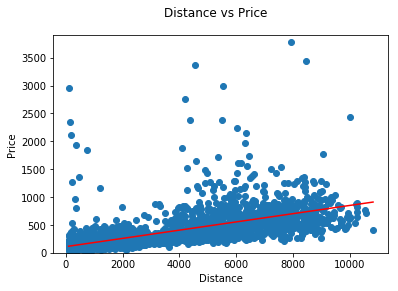

In [12]:
x = avg_price_by_distance.index.values
y = avg_price_by_distance['Price (USD)']

plt.scatter(x, y)
plt.ylim(0,3900)

prices_plot = plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), c='red')

plt.xlabel('Distance')
plt.ylabel('Price')
plt.suptitle('Distance vs Price')

plt.savefig('prices_plot.png')
prices_plot

In [13]:
correlation_table = avg_price_by_distance.reset_index()
correlation_table.head()

,Distance (Miles),Price (USD)
0,103,204.316667
1,105,73.835000
2,108,115.163333
3,110,301.270000
4,111,107.475000


In [14]:
correlation_table['Distance (Miles)'].corr(correlation_table['Price (USD)'])

0.49328797405712

In [28]:
new_combined_prices = combined_prices
bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
labels = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
new_combined_prices['binned'] = pd.cut(new_combined_prices['Distance (Miles)'], bins=bins, labels=labels)

In [29]:
new_combined_prices.head()
grouped_new_combined_prices = new_combined_prices.groupby('binned')
avg_new_combined_prices = grouped_new_combined_prices['Price (USD)'].mean()
avg_new_combined_prices = pd.DataFrame(avg_new_combined_prices)
avg_new_combined_prices = avg_new_combined_prices.reset_index()
avg_new_combined_prices

,binned,Price (USD)
0,1000,160.155639
1,2000,180.460502
2,3000,198.374607
3,4000,329.114177
4,5000,455.835802
5,6000,578.622890
6,7000,637.026283
7,8000,629.614361
8,9000,690.172043
9,10000,682.369367


<function matplotlib.pyplot.show(*args, **kw)>

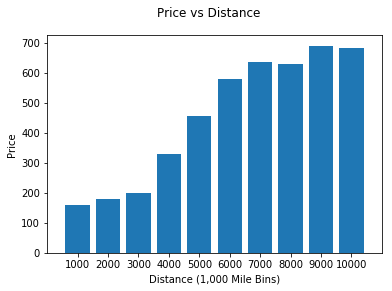

In [49]:
x = range(len(avg_new_combined_prices['binned']))
y = avg_new_combined_prices['Price (USD)']
plt.bar(x, y)
plt.xlim(-1,10)
plt.xticks(x,labels)
plt.xlabel('Distance (1,000 Mile Bins)')
plt.ylabel('Price')
plt.suptitle('Price vs Distance')

plt.show